In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nbn = "05_" # Notebook Number; Prefix for artifacts path

In [112]:
datasets = ["Caltech256","SUN397","iWildCam","iWildCamOOD","CIFAR10","CINIC10"]
test_dypes = ["InD","InD","InD","OOD","InD","OOD"]

nrow, ncol=2, 3
pred_prefix = "csv/prediction_"
unc_prefix = "csv/uncertainty_"

## Accuracy vs Coverage Tradeoff

### Baseline: Softmax Response (Selective Classification for Deep Neural Networks)

In [113]:
def get_cov_acc(pred, cov_range,rank_cri,len_pred,rank_name,ax,evaluatee):
    temp=pd.DataFrame()
    temp["coverage"] = cov_range
    coverage_ls = cov_range/100*len_pred
    for i, cov in enumerate(coverage_ls):
        cov_pred = pred[rank_cri<cov]
        temp.loc[i,"acc"] = np.mean(cov_pred[evaluatee]==cov_pred["target"])
    area = np.trapz(temp["acc"], cov_range)
    sns.lineplot(temp,x="coverage",y="acc",label=f"(AUC: {area:.2f}) - {rank_name} on {evaluatee}",ax = ax)

In [114]:
def get_rank(unc_pred):
    rank = pd.DataFrame()
    metrics_asc = [
        (unc_pred["ent_18"], "entr18_on_res18"),
        (unc_pred["ent_50"], "entr50_on_res50"),
        (unc_pred["ent_101"], "entr101_on_res101"),
        (unc_pred["ce_50_18"], "ce_50_18_on_res50"),
        (unc_pred["ent_50"] + unc_pred["ce_50_18"], "entr50_+_ce_50_18_on_res50"),
        (unc_pred["ent_50_np"] * unc_pred["ce_50_18_np"], "entr50_x_ce_50_18_on_res50")
    ]
    metrics_desc = [
        (unc_pred["softmax_response18"], "sr18"),
        (unc_pred["softmax_response50"], "sr50"),
        (unc_pred["softmax_response101"], "sr101"),
    ]
    for unc_vec,name in metrics_asc:
        rank[name] = unc_vec.rank()
    for unc_vec,name in metrics_desc:
        rank[name] = unc_vec.rank(ascending=False)
    return rank

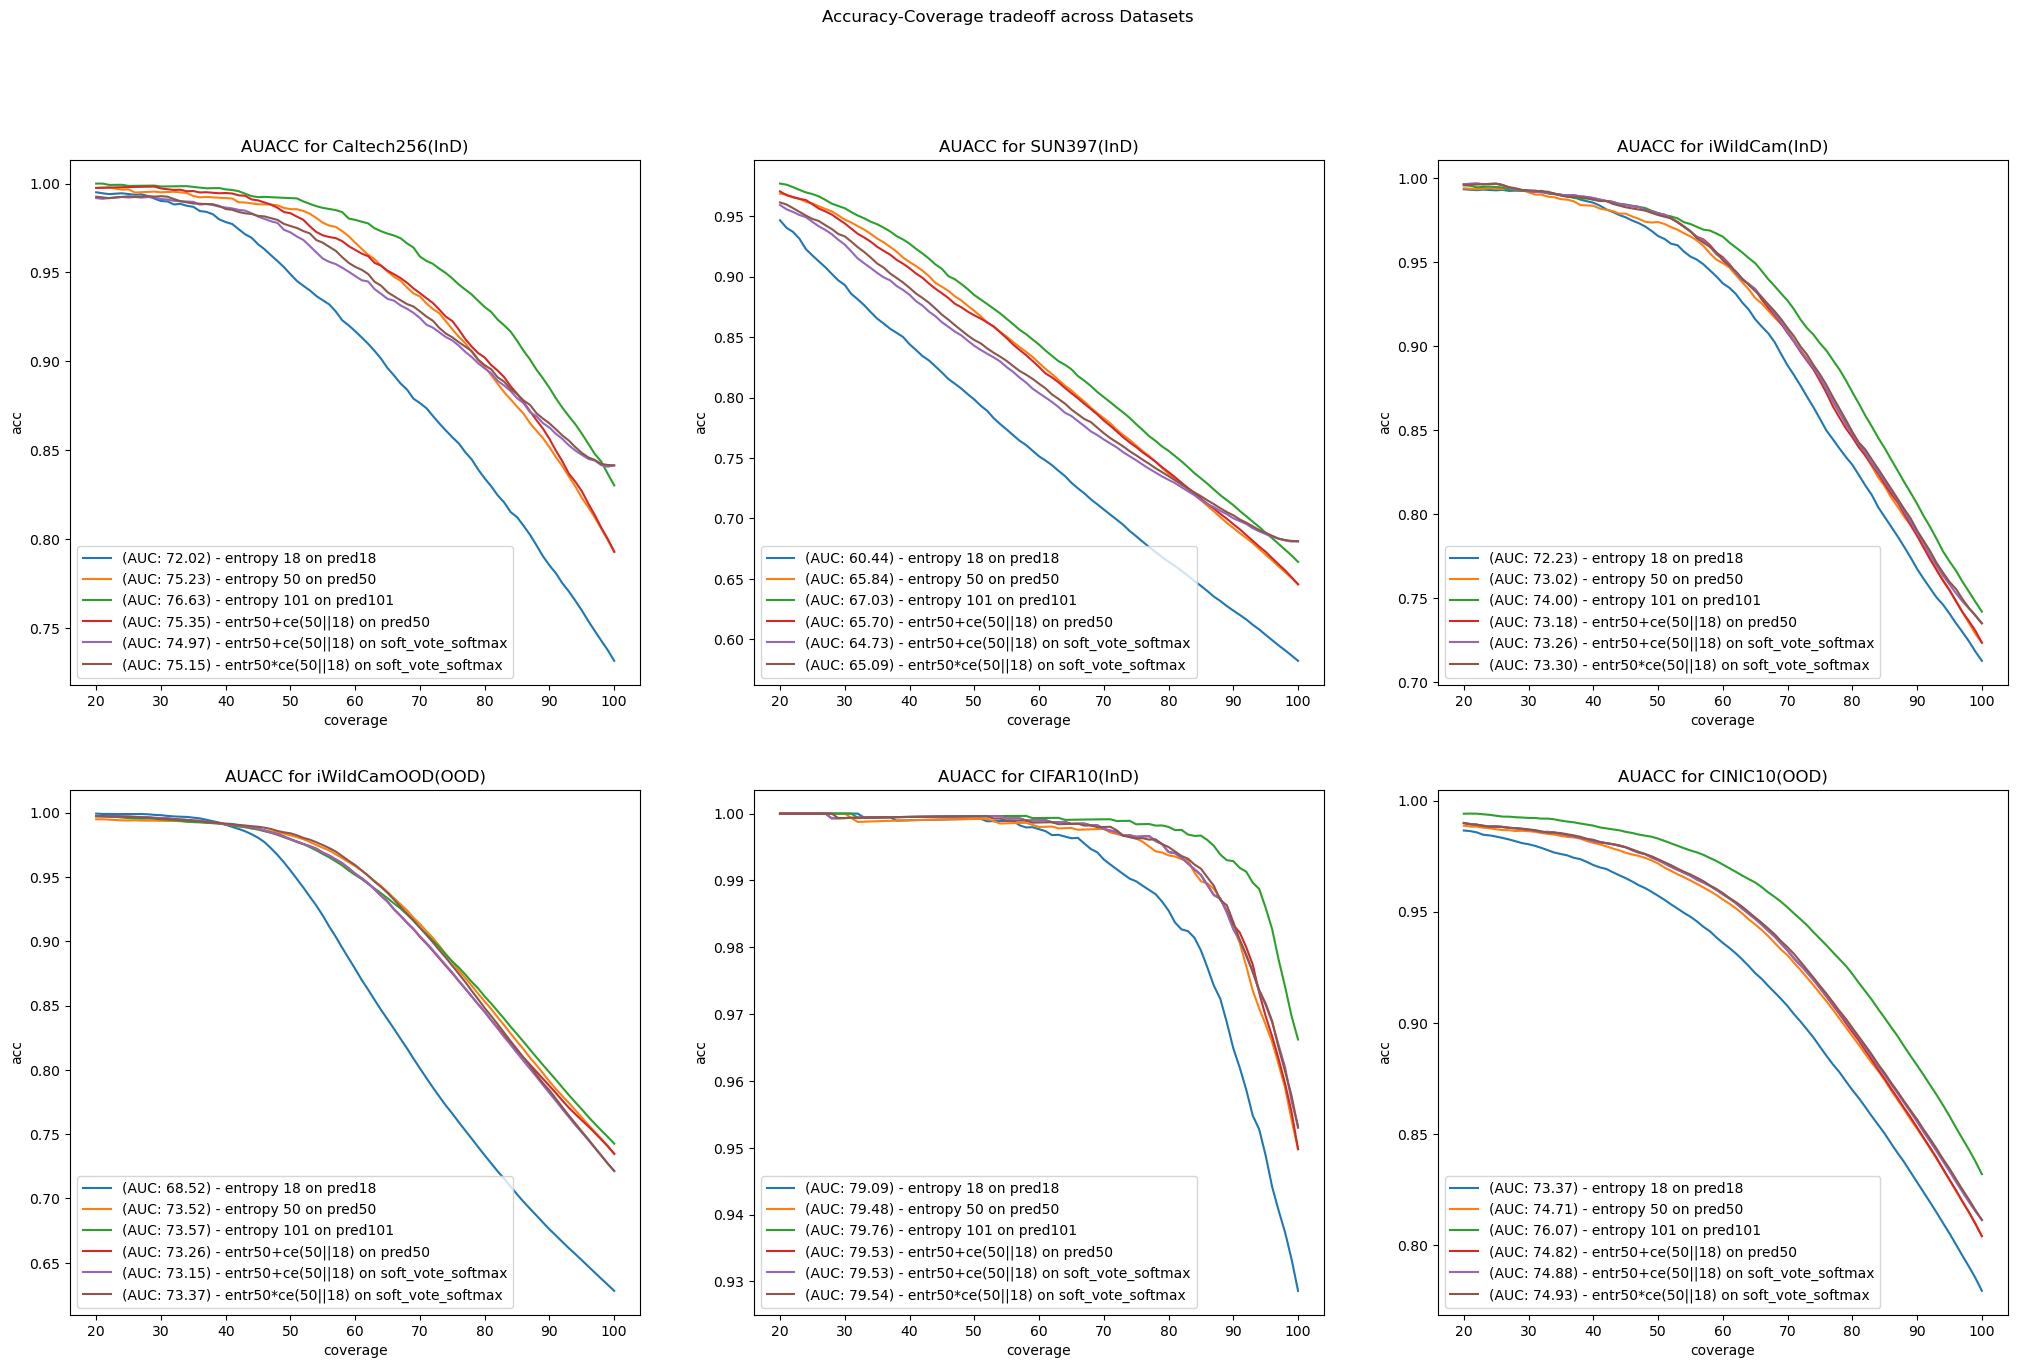

In [115]:
cov_range = np.arange(20,101)
fig, axes = plt.subplots(nrow, ncol, figsize=(25, 15))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"{pred_prefix}{ds}_Resnet.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"{unc_prefix}{ds}_Resnet.csv", index_col="Unnamed: 0")
    rank=get_rank(unc_pred)
    ax = axes[i // ncol, i % ncol]
    get_cov_acc(pred,cov_range,rank["entr18_on_res18"],pred.shape[0],"entropy 18",ax, "pred18")
    get_cov_acc(pred,cov_range,rank["entr50_on_res50"],pred.shape[0],"entropy 50",ax, "pred50")
    get_cov_acc(pred,cov_range,rank["entr101_on_res101"],pred.shape[0],"entropy 101",ax, "pred101")
    get_cov_acc(pred,cov_range,rank["entr50_+_ce_50_18_on_res50"],pred.shape[0],"entr50+ce(50||18)",ax, "pred50")
    get_cov_acc(pred,cov_range,rank["entr50_+_ce_50_18_on_res50"],pred.shape[0],"entr50+ce(50||18)",ax, "soft_vote_softmax")
    get_cov_acc(pred,cov_range,rank["entr50_x_ce_50_18_on_res50"],pred.shape[0],"entr50*ce(50||18)",ax, "soft_vote_softmax")
    ax.set_title(f"AUACC for {ds}({test_dypes[i]})")
plt.suptitle(f"Accuracy-Coverage tradeoff across Datasets")
plt.savefig(f"artifacts/{nbn}auacc.png")

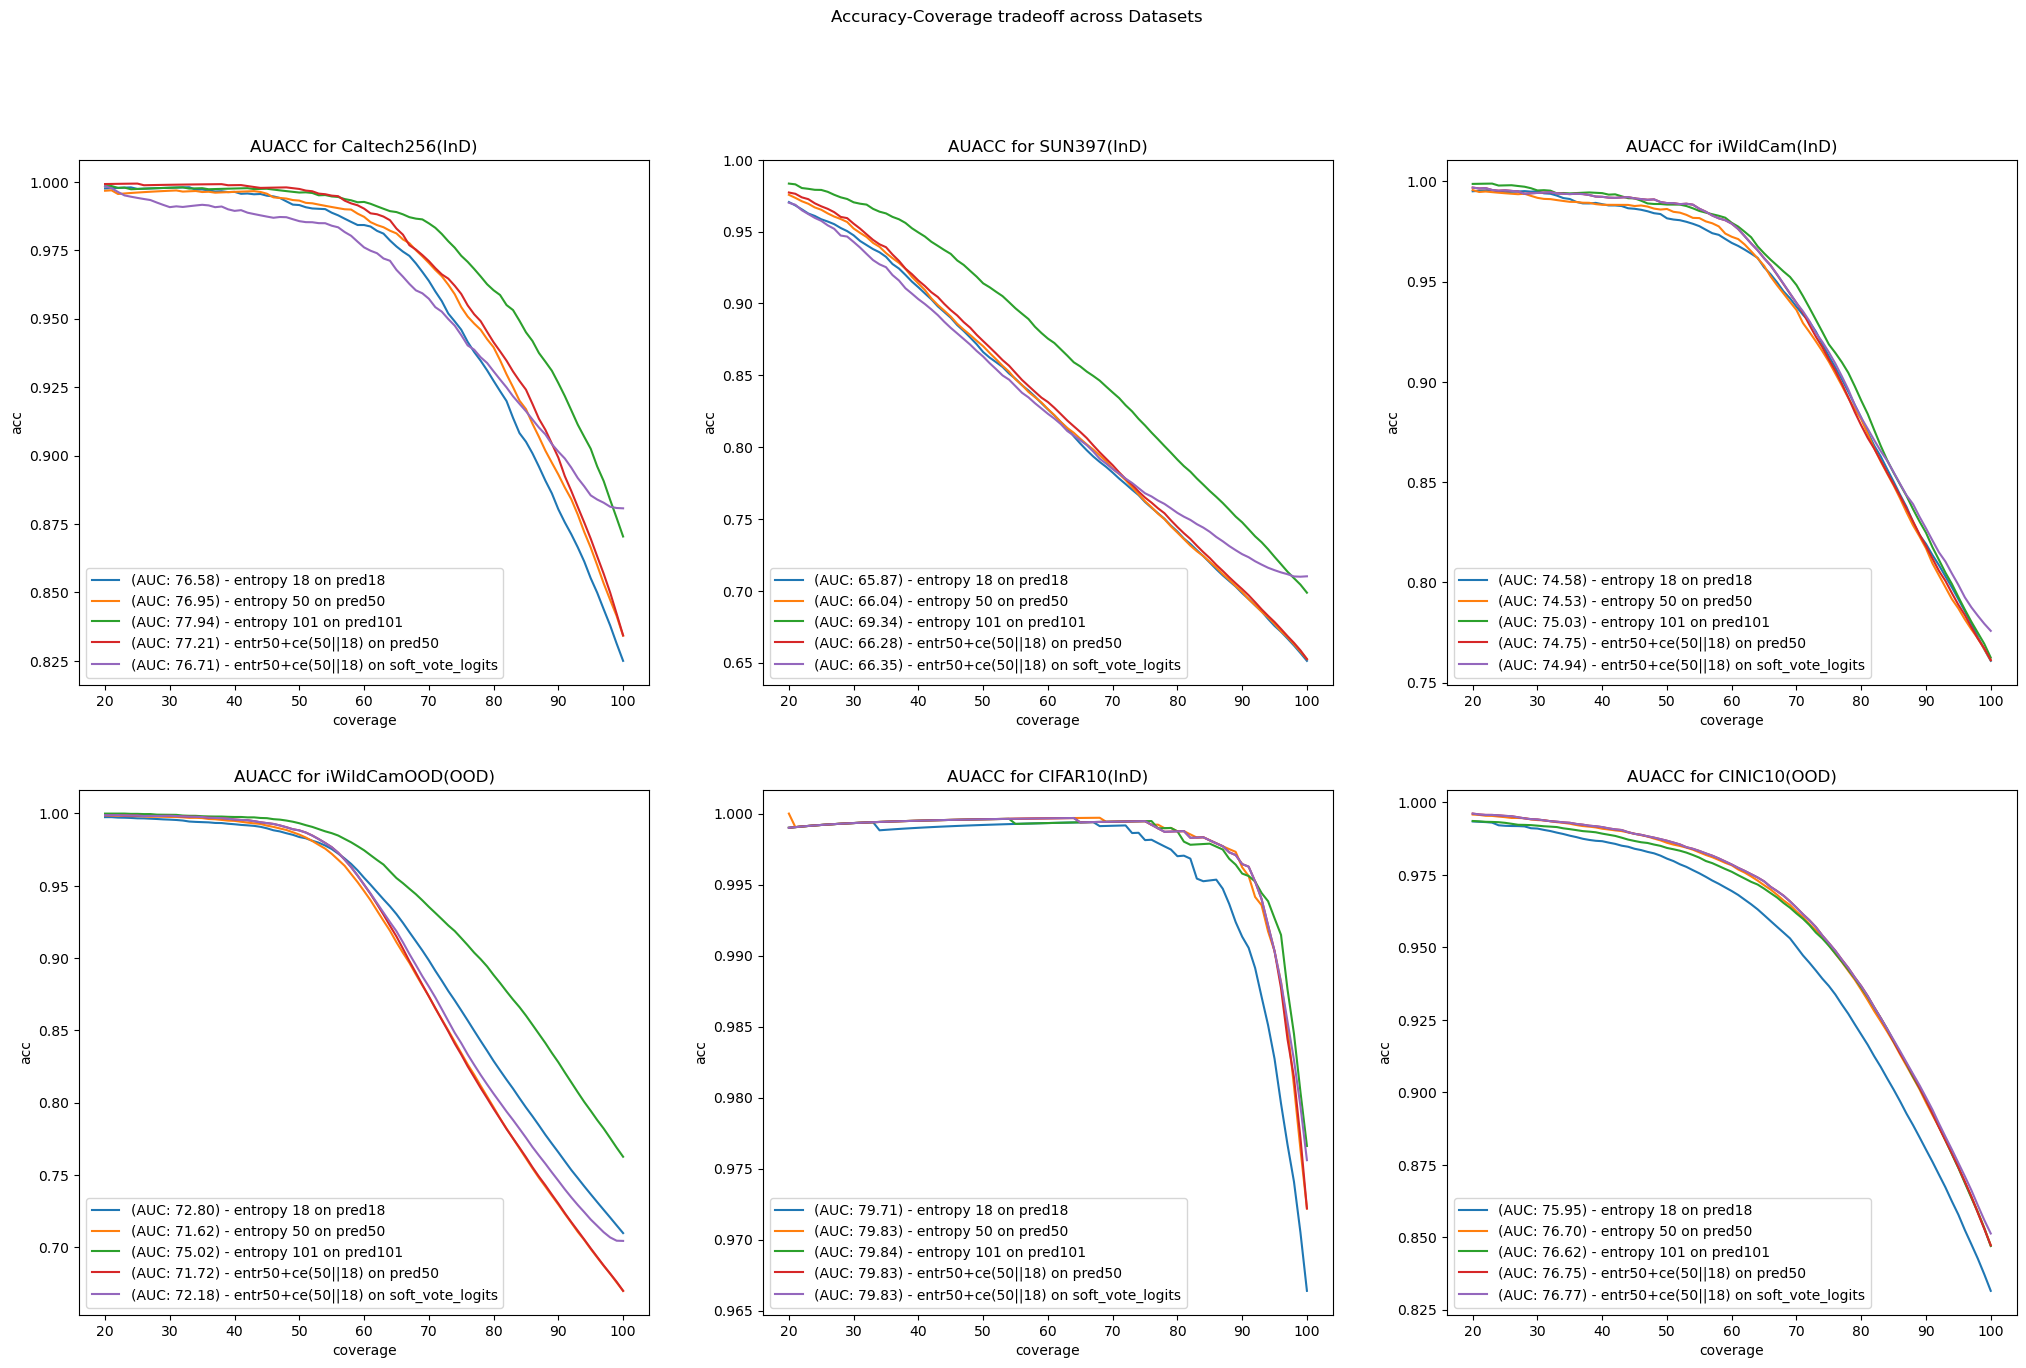

In [98]:
cov_range = np.arange(20,101)
fig, axes = plt.subplots(nrow, ncol, figsize=(25, 15))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"{pred_prefix}{ds}_Effnet.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"{unc_prefix}{ds}_Effnet.csv", index_col="Unnamed: 0")
    rank=get_rank(unc_pred)
    ax = axes[i // ncol, i % ncol]
    get_cov_acc(pred,cov_range,rank["entr18_on_res18"],pred.shape[0],"entropy 18",ax, "pred18")
    get_cov_acc(pred,cov_range,rank["entr50_on_res50"],pred.shape[0],"entropy 50",ax, "pred50")
    get_cov_acc(pred,cov_range,rank["entr101_on_res101"],pred.shape[0],"entropy 101",ax, "pred101")
    get_cov_acc(pred,cov_range,rank["entr50_+_ce_50_18_on_res50"],pred.shape[0],"entr50+ce(50||18)",ax, "pred50")
    get_cov_acc(pred,cov_range,rank["entr50_+_ce_50_18_on_res50"],pred.shape[0],"entr50+ce(50||18)",ax, "soft_vote_logits")
    ax.set_title(f"AUACC for {ds}({test_dypes[i]})")
plt.suptitle(f"Accuracy-Coverage tradeoff across Datasets")
plt.savefig(f"artifacts/{nbn}auacc.png")